# All these sick animals

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Open your dataset up using pandas in a Jupyter notebook

Switzerland does [publish statistics](https://www.infosm.blv.admin.ch/public/) about deseases by animals. I downloaded the statistics for the canton of Bern. Since the file was encoded in ISO-8859 I had to convert it to UTF8 using the following linux command: iconv-f ISO-8859-1 infile.csv -t UTF8 -o outfile.csv.

In [84]:
df = pd.read_csv("sickanimals.csv", sep=";", header=0)

## Do a .head() to get a feel for your data

In [85]:
df.head()

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
0,01.12.2006,Bern,Schwarzenburg,Albligen,Zu bekämpfende Seuchen,Schafräude (2009 aus TSV gestrichen),Schaf,NaN,0,0
1,12.12.2006,Bern,Burgdorf,Kernenried,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0
2,12.12.2006,Bern,Trachselwald,Rüegsau,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0
3,13.12.2006,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
4,07.12.2006,Bern,Trachselwald,Sumiswald,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0


## Write down 12 questions to ask your data, or 12 things to hunt for in the data.

- What diseases affected the highest number of animals?
- How many animals were killed in total?
- What were the most lethal incidies?
- What are the most transferable deseases for every kind of animals?
- In what villages and towns did most incidents happen? 
- What incidents occured in the town Aarberg?
- What animals are the sickest?
- When did the "Kryptosporidiose" diseases happen in the municipality Courtelary?
- In what year was the largest number of animals sick? 


- How many entries in total? 
- How many entries per year?
- What municipality has the most entries? 
- What municipality had the most infected animals?
- In what municipality were the most animals killed?
- What year was bad?
- How many cases per species? 

## What diseases affected the highest number of animals?

In [86]:
df.sort_values('anzahlinfizierterfaelle', ascending = False).head(10)

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
471,21.12.2000,Bern,Trachselwald,Affoltern im Emmental,Zu bekämpfende Seuchen,Salmonella-Enteritidis-Infektion der Hühner (b...,Huhn,NaN,760,760
293,16.12.2002,Bern,Oberhasli,Gadmen,Zu bekämpfende Seuchen,Schafräude (2009 aus TSV gestrichen),Schaf,NaN,70,0
4445,11.12.2003,Bern,Aarberg,Rapperswil (BE),Zu bekämpfende Seuchen,Enzootische Pneumonie der Schweine,Schwein,NaN,60,60
2537,27.04.2008,Bern,Nidau,Twann,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,54,0
812,27.09.2001,Bern,La Neuveville,Lamboing,Zu bekämpfende Seuchen,Faulbrut der Bienen,Bienen,NaN,34,0
4039,03.11.2015,Bern,Signau,Röthenbach im Emmental,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,30,30
1502,09.06.2005,Bern,Trachselwald,Huttwil,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,29,0
4617,06.11.2007,Bern,Thun (bis 2010),Steffisburg,Zu überwachende Seuchen,Proliferative Nierenkrankheit der Fische,Fisch,NaN,25,0
2540,20.04.2008,Bern,Büren,Busswil bei Büren,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,20,0
218,24.04.2007,Bern,Thun (bis 2010),Unterlangenegg,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,20,0


## How many animals were killed in total?

In [87]:
df['anzahlgetoetefaelle'].sum()

11712

## What were the most lethal incidies?

In [88]:
df.sort_values('anzahlgetoetefaelle', ascending=False).head() 

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
7480,27.01.2016,Bern,Erlach,Ins,Zu bekämpfende Seuchen,Salmonella-Infektion des Geflügels und der Sch...,Huhn,NaN,1,4900
8135,12.01.2016,Bern,Interlaken-Oberhasli,Meiringen,Zu bekämpfende Seuchen,Salmonella-Infektion des Geflügels und der Sch...,Huhn,Legehenne,1,3000
326,25.08.2000,Bern,Büren,Wengi,Zu bekämpfende Seuchen,Salmonella-Enteritidis-Infektion der Hühner (b...,Huhn,NaN,0,2000
471,21.12.2000,Bern,Trachselwald,Affoltern im Emmental,Zu bekämpfende Seuchen,Salmonella-Enteritidis-Infektion der Hühner (b...,Huhn,NaN,760,760
739,15.06.1993,Bern,Signau,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,400


## What are the most transferable deseases for every kind of animals? 

In [89]:
df[df['seuchengruppe'] == 'Hochansteckende Seuchen'].sort_values('tierart')

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
685,15.12.1995,Bern,Nidau,NaN,Hochansteckende Seuchen,Newcastle Krankheit,Huhn,NaN,0,0
4524,15.11.1992,Bern,Nidau,Täuffelen,Hochansteckende Seuchen,Newcastle Krankheit,Huhn,NaN,1,0
7753,15.08.1995,Bern,Burgdorf,NaN,Hochansteckende Seuchen,Newcastle Krankheit,Huhn,NaN,0,0
7761,15.03.1994,Bern,Oberhasli,NaN,Hochansteckende Seuchen,Newcastle Krankheit,Huhn,NaN,0,0
739,15.06.1993,Bern,Signau,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,400
740,15.12.1993,Bern,Burgdorf,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,174
7854,15.10.1993,Bern,Bern,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,89
621,15.01.1996,Bern,Büren,Diessbach bei Büren,Hochansteckende Seuchen,Newcastle Krankheit,Taube,NaN,0,0
622,15.01.1996,Bern,Konolfingen,NaN,Hochansteckende Seuchen,Newcastle Krankheit,Taube,NaN,0,0
2959,08.10.2009,Bern,Thun (bis 2010),Sigriswil,Hochansteckende Seuchen,Newcastle Krankheit,Taube,NaN,2,0


## In what villages and towns did most incidents happen? 

In [90]:
df['gemeinde'].value_counts().head(15)

Sumiswald              146
Langnau im Emmental    145
Frutigen               113
Köniz                  112
Wahlern                110
Buchholterberg         110
Lützelflüh             108
Rüeggisberg             93
Huttwil                 92
Rüderswil               89
Rüegsau                 88
Worb                    88
Hasle bei Burgdorf      87
Wynigen                 85
Eggiwil                 81
Name: gemeinde, dtype: int64

## What incidents occured in the town Aarberg?

In [91]:
df[df['gemeinde'] == 'Aarberg']

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
1221,02.06.2004,Bern,Aarberg,Aarberg,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,3,0
1604,10.09.2005,Bern,Aarberg,Aarberg,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0
5036,10.10.2008,Bern,Aarberg,Aarberg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0
5095,20.10.2008,Bern,Aarberg,Aarberg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,3,0
5419,27.11.2008,Bern,Aarberg,Aarberg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0


## What animals are the sickest?

In [92]:
df['tierart'].value_counts()

Rind                 3487
Bienen               3448
Ziege                 373
Schaf                 237
Schwein               125
Hund                  101
Kaninchen              82
Huhn                   64
Fisch                  49
Fuchs                  47
Taube                  20
Katze                  17
Luchs                  17
Papagei                16
Schlange               10
Pferd                   9
Hase                    8
anderes Haustier        6
Hirsch                  5
Marder                  4
Echse                   3
Sittich                 3
anderes Wildtier        2
Affe                    2
anderer Wildvogel       2
Wildschwein             1
anderes Zootier         1
Wolf                    1
Dachs                   1
Name: tierart, dtype: int64

##  When did the "Kryptosporidiose" diseases happen in the municipality Courtelary?

In [93]:
df[(df['tierseuche'] == "Kryptosporidiose") & (df['bezirk'] == 'Courtelary')]

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
3,13.12.2006,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
13,21.03.2007,Bern,Courtelary,Corgémont,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
132,19.02.2007,Bern,Courtelary,Tramelan,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
137,27.02.2007,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
143,19.02.2007,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
2210,18.06.2007,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
2365,11.10.2007,Bern,Courtelary,La Ferrière,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
2430,05.12.2007,Bern,Courtelary,Cormoret,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
2472,08.01.2008,Bern,Courtelary,Sonceboz-Sombeval,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
2486,21.01.2008,Bern,Courtelary,Corgémont,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0


## What are the last 10 incidies in the database?

In [94]:
# In order to answer this question, we need to add an additional column containing the dates in a easier sortable format.

import dateutil
import datetime

def string_to_date(row):
    newdate = dateutil.parser.parse(row, dayfirst=True)
    return newdate.strftime("%Y-%m-%d")

df['date_us'] = df['diagnosedatum'].apply (lambda row: string_to_date(row) )

In [98]:
df.sort_values('date_us', ascending=False).head(10)

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle,date_us
8140,13.06.2016,Bern,Schwarzenburg,Rüschegg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,1,2016-06-13
8139,09.06.2016,Bern,Signau,Röthenbach im Emmental,Zu überwachende Seuchen,Maedi-Visna,Ziege,NaN,1,0,2016-06-09
4098,09.06.2016,Bern,Büren,Diessbach bei Büren,Zu bekämpfende Seuchen,Salmonellose,Pferd,NaN,1,0,2016-06-09
4097,09.06.2016,Bern,Trachselwald,Lützelflüh,Zu überwachende Seuchen,Echinococcose,Schwein,NaN,1,0,2016-06-09
4092,03.06.2016,Bern,Interlaken-Oberhasli,Guttannen,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2016-06-03
4091,03.06.2016,Bern,Thun,Heimberg,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2016-06-03
4096,02.06.2016,Bern,Bern-Mittelland,Münchenbuchsee,Zu bekämpfende Seuchen,Faulbrut der Bienen,Bienen,NaN,1,0,2016-06-02
4094,02.06.2016,Bern,Emmental,Langnau im Emmental,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2016-06-02
4087,30.05.2016,Bern,Interlaken-Oberhasli,Innertkirchen,Zu überwachende Seuchen,Maedi-Visna,Ziege,NaN,1,0,2016-05-30
4088,30.05.2016,Bern,Oberhasli,Innertkirchen,Zu überwachende Seuchen,Maedi-Visna,Ziege,NaN,1,0,2016-05-30


## What are the first 5 incidies in the database?

In [102]:
df.sort_values('date_us', ascending=True).head(5)

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle,date_us
758,15.01.1991,Bern,Burgdorf,NaN,Auszurottende Seuchen,Bovine spongiforme Enzephalopathie (BSE),Rind,NaN,0,0,1991-01-15
4190,15.01.1991,Bern,Trachselwald,NaN,Zu überwachende Seuchen,Coxiellose,Rind,NaN,0,0,1991-01-15
4189,15.01.1991,Bern,Aarwangen,NaN,Zu überwachende Seuchen,Coxiellose,Rind,NaN,0,0,1991-01-15
757,15.02.1991,Bern,Thun (bis 2010),NaN,Zu bekämpfende Seuchen,Salmonellose,Huhn,NaN,0,0,1991-02-15
756,15.02.1991,Bern,Seftigen,NaN,Zu bekämpfende Seuchen,Salmonellose,Huhn,NaN,0,0,1991-02-15


## What day did they count the largest number of sick animals? 

In [107]:
df[d'date_us', df['anzahlinfizierterfaelle']


SyntaxError: unexpected EOF while parsing (<ipython-input-107-71e737f1c037>, line 1)

## Make three charts with your dataset

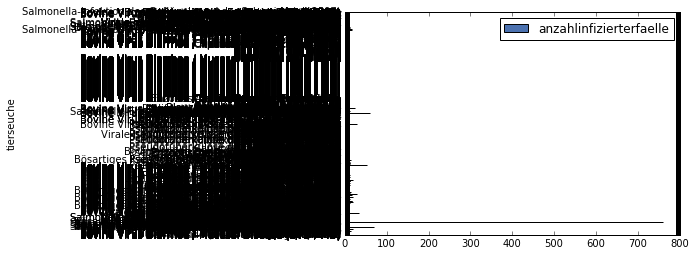

In [109]:
plt.style.use('seaborn-deep')
df.plot(kind='barh', x='tierseuche', y='anzahlinfizierterfaelle')